**Ciencia y analítica de datos**

**Carlos Álvarez**

Ejemplo bácisco de exploración de datos (EDA)

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Ciencia y Analitica de Datos_TC4029.11/Modulo 3/Actividad 4.0"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [ ]:
#Las columnas numéricas son: 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_history_length' en total: 7
#Las columnas cualitativas:  'person_home_ownership','loan intent','loan grade', loan_status', 'cb_person_default_on_file', en total : 5
#Aunque la columna 'loan_status' contiene números entre 1 y 0, estos no tienen un orden numérico y se usan para representar categorías, por lo que se considera a la columna como cualitativa.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [ ]:
#La propiedad "Shape" indica que hay 32,581 datos en el dataframe, la cantidad de valores nulos por columna con metodo isna() y sumandolos con  metodo sum  indicaria los valores faltantes.
#Esas cantidades se dividen por la cantidad de datos y se multiplica por 100 para obtener los porcentajes

df.isna().sum()/df.shape[0] * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [ ]:
#Pasando columnas numéricas a un dataframe especial
df_numericas = df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
#Se obtiene media, mediana, min, max, desviación estándar y quartiles de la funcion describe
df_pregunta_3 = df_numericas.describe().T[['mean','50%', 'min', 'max', 'std', '25%', '50%', '75%']]
#Se renombra la columna 50% a 'median'
df_pregunta_3.rename(columns = {'50%' : 'median(50%)'}, inplace = True)
#Se obtienen los valores de asimetría y curtosis y se agregan a la tabla principal
df_kurt = df_numericas.kurt().to_frame()
df_kurt.columns = ['kurt']
df_pregunta_3 = pd.merge(df_pregunta_3, df_kurt, left_index = True, right_index = True)

df_skew = df_numericas.skew().to_frame()
df_skew.columns = ['Skew']
df_pregunta_3 = pd.merge(df_pregunta_3, df_skew, left_index=True, right_index=True)
df_pregunta_3

# Los valores de asimetría en:

#   person_age: Es asimetría positiva significa que los datos mas alejados de la media se encuentran a la derecha de esta y el valor de asimetría es mayor a uno.
#   loan_in_rate: Es relativamente simetrica, ambas colas de la distribución son similares respecto a la media y esto se puede ver en el valor relativamente pequeño de asimetría (menor a 1).

# Los valores en curtosis:

#   person_age: La distribución para esta columna es leptocúrtica, el valor de la curtosis es mayor a 3
#   loan_in_rate: La distribución para esta columa es platicúrtica, el valor de la curtosis es negativa.

,mean,median(50%),min,max,std,25%,median(50%),75%,kurt,Skew
person_age,27.734600,26.00,20.00,144.00,6.348078,23.00,26.00,30.00,18.560825,2.581393
person_income,66074.848470,55000.00,4000.00,6000000.00,61983.119168,38500.00,55000.00,79200.00,2693.272776,32.865349
person_emp_length,4.789686,4.00,0.00,123.00,4.142630,2.00,4.00,7.00,43.722338,2.614455
loan_amnt,9589.371106,8000.00,500.00,35000.00,6322.086646,5000.00,8000.00,12200.00,1.423565,1.192477
loan_int_rate,11.011695,10.99,5.42,23.22,3.240459,7.90,10.99,13.47,-0.671609,0.208550
loan_percent_income,0.170203,0.15,0.00,0.83,0.106782,0.09,0.15,0.23,1.223687,1.064669
cb_person_cred_hist_length,5.804211,4.00,2.00,30.00,4.055001,3.00,4.00,8.00,3.716194,1.661790


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

(10.0, 70.0)

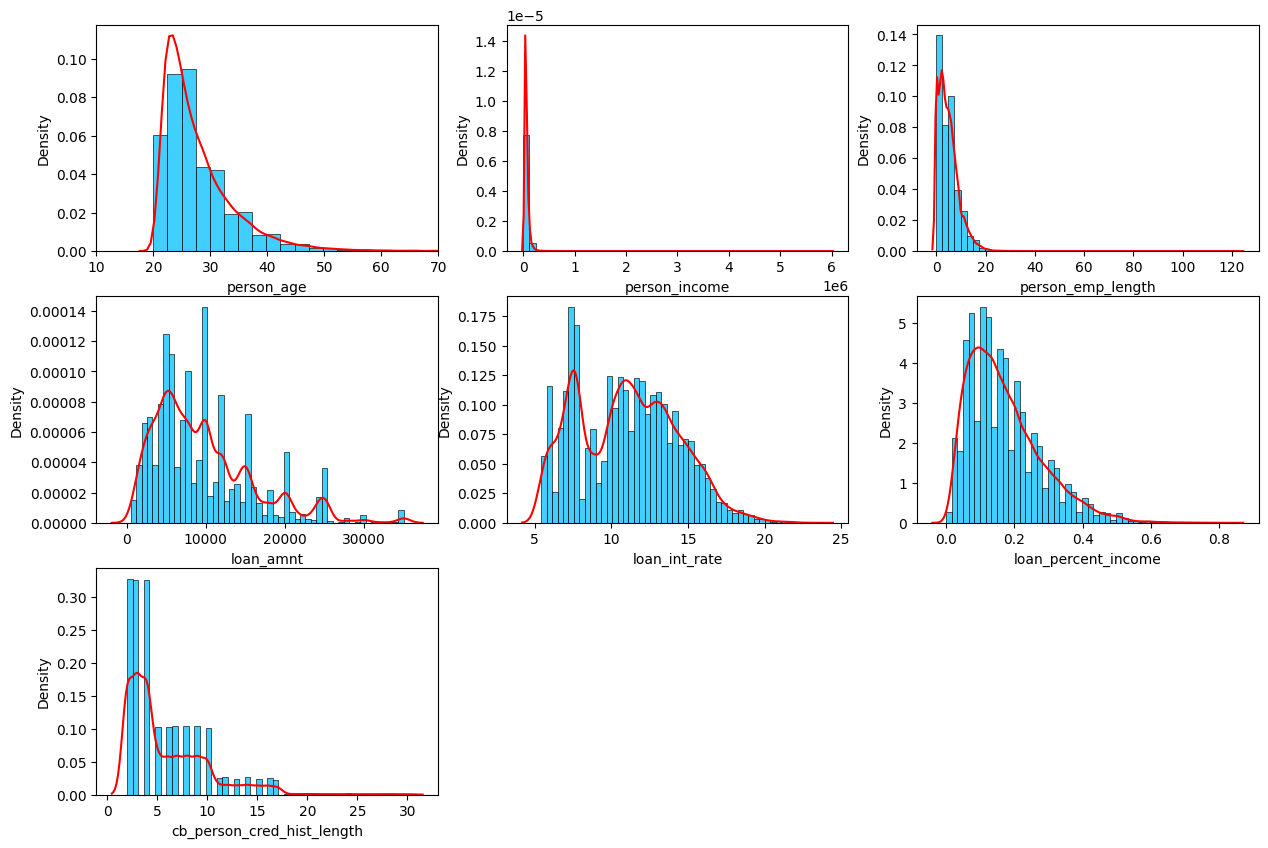

In [ ]:

fig4 = plt.figure(figsize=(15,10))
ax1_4 = fig4.add_subplot(3,3,1)
ax2_4 = fig4.add_subplot(3,3,2)
ax3_4 = fig4.add_subplot(3,3,3)
ax4_4 = fig4.add_subplot(3,3,4)
ax5_4 = fig4.add_subplot(3,3,5)
ax6_4 = fig4.add_subplot(3,3,6)
ax7_4 = fig4.add_subplot(3,3,7)


#Utilizando histplot, nos grafica la densidad de probabilidad para poder tener una visión mas clara de la distribnución en conjunto
#con la graficación de la linea KDE (kernel density estimate). Esta es una actualización de la librería de Seaborn.

sns.histplot(df_numericas['person_age'], ax = ax1_4, bins = 50, stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['person_age'], color='red', ax = ax1_4)

sns.histplot(df_numericas['person_income'], ax = ax2_4, bins = 50 , stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['person_income'], color='red', ax = ax2_4)

sns.histplot(df_numericas['person_emp_length'].dropna(), ax = ax3_4, bins = 50 , stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['person_emp_length'], color='red', ax = ax3_4)

sns.histplot(df_numericas['loan_amnt'], ax = ax4_4, bins = 50 , stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['loan_amnt'], color='red', ax = ax4_4)

sns.histplot(df_numericas['loan_int_rate'].dropna(), ax = ax5_4, bins = 50 , stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['loan_int_rate'], color='red', ax = ax5_4)

sns.histplot(df_numericas['loan_percent_income'], ax = ax6_4, bins = 50 , stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['loan_percent_income'], color='red', ax = ax6_4)

sns.histplot(df_numericas['cb_person_cred_hist_length'], ax = ax7_4, bins = 50 , stat = 'density', color = 'deepskyblue', edgecolor= 'black')
sns.kdeplot(df_numericas['cb_person_cred_hist_length'], color='red', ax = ax7_4)

ax1_4.set_xlim(10, 70)

# Como se puede apreciar mediante las gráficas, para la variable person_age el valor de asimetría positivo se puede apreciar por la cola de la distribución estar mas larga del lado derecho.
# Para la distribución "loan_int_rate" ambas colas son relativamente similares y centradas respecto a la media por lo que se puede considerar relativamnente simétrica.
# Se puede decir que las gráficas se corresponden con el cálculo obtenido en la tabla.




5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

<Axes: xlabel='cb_person_cred_hist_length'>

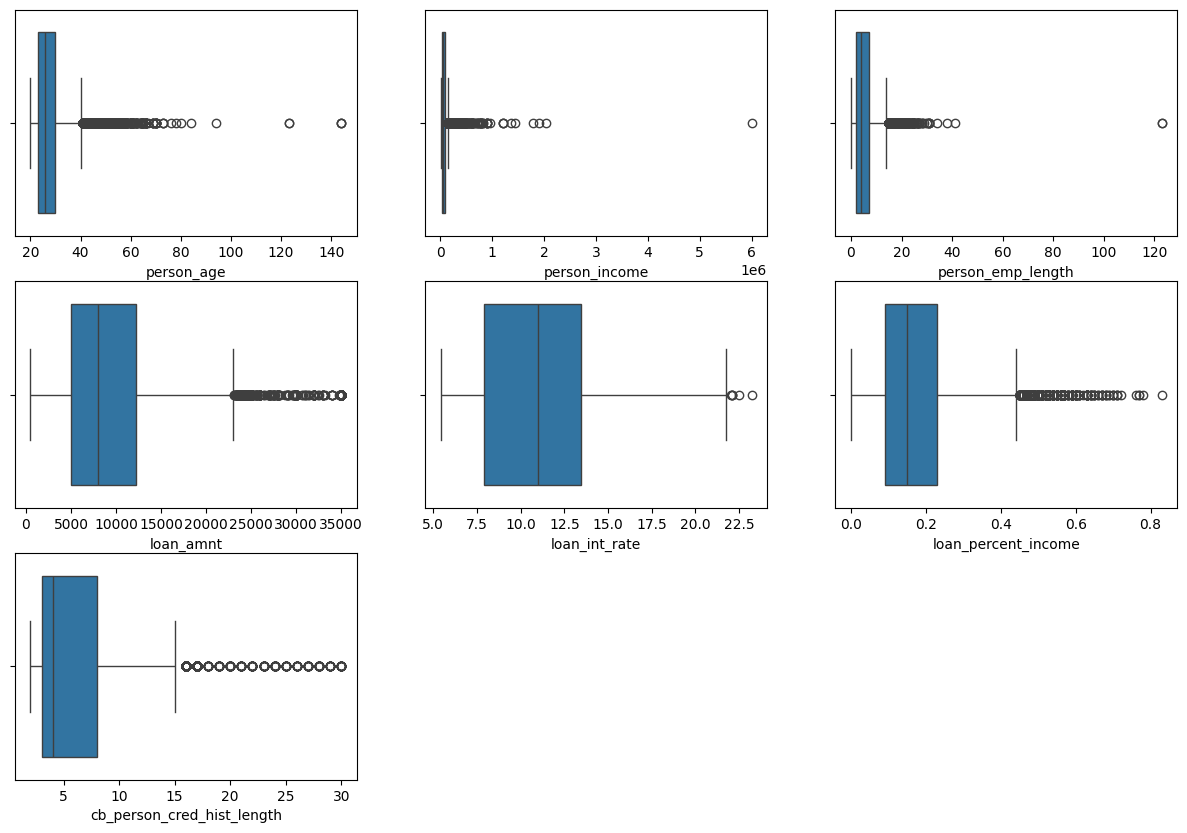

In [ ]:
fig5 = plt.figure(figsize=(15,10))
ax1_5 = fig5.add_subplot(3,3,1)
ax2_5 = fig5.add_subplot(3,3,2)
ax3_5 = fig5.add_subplot(3,3,3)
ax4_5 = fig5.add_subplot(3,3,4)
ax5_5 = fig5.add_subplot(3,3,5)
ax6_5 = fig5.add_subplot(3,3,6)
ax7_5 = fig5.add_subplot(3,3,7)

sns.boxplot(x="person_age",data = df_numericas, ax=ax1_5)
sns.boxplot(x="person_income",data = df_numericas, ax=ax2_5)
sns.boxplot(x="person_emp_length",data = df_numericas, ax=ax3_5)
sns.boxplot(x="loan_amnt",data = df_numericas, ax=ax4_5)
sns.boxplot(x="loan_int_rate",data = df_numericas, ax=ax5_5)
sns.boxplot(x="loan_percent_income",data = df_numericas, ax=ax6_5)
sns.boxplot(x="cb_person_cred_hist_length",data = df_numericas, ax=ax7_5)





*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [ ]:
#Se considera un dataframe especial para las columnas categóricas
df_categoricas = df[['person_home_ownership','loan_intent','loan_grade','loan_status', 'cb_person_default_on_file']]
#Debido a que loan_status se consideró como categórico por tener valores entre unos y ceros se asigna texto para introducirlo en este análisis.
df_categoricas['loan_status'] = df_categoricas['loan_status'].map({0:"inactive", 1:"active"})

df_categoricas.describe(include = 'object').T.rename(columns = {'top' : 'moda', 'unique': 'cardinalidad' })

<ipython-input-12-ee5a1065c01b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoricas['loan_status'] = df_categoricas['loan_status'].map({0:"inactive", 1:"active"})


,count,cardinalidad,moda,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
loan_status,32581,2,inactive,25473
cb_person_default_on_file,32581,2,N,26836


In [ ]:

df_categoricas['person_home_ownership'].value_counts().to_frame().reset_index().rename( columns={ 'count': 'Recuento'})

,person_home_ownership,Recuento
0,RENT,16446
1,MORTGAGE,13444
2,OWN,2584
3,OTHER,107


In [ ]:
df_categoricas['loan_intent'].value_counts().to_frame().reset_index().rename( columns={ 'count': 'Recuento'})

,loan_intent,Recuento
0,EDUCATION,6453
1,MEDICAL,6071
2,VENTURE,5719
3,PERSONAL,5521
4,DEBTCONSOLIDATION,5212
5,HOMEIMPROVEMENT,3605


In [ ]:
df_categoricas['loan_grade'].value_counts().to_frame().reset_index().rename( columns={ 'count': 'Recuento'})

,loan_grade,Recuento
0,A,10777
1,B,10451
2,C,6458
3,D,3626
4,E,964
5,F,241
6,G,64


In [ ]:
df_categoricas['loan_status'].value_counts().to_frame().reset_index().rename( columns={ 'count': 'Recuento'})

,loan_status,Recuento
0,inactive,25473
1,active,7108


In [ ]:
df_categoricas['cb_person_default_on_file'].value_counts().to_frame().reset_index().rename( columns={ 'count': 'Recuento'})

,cb_person_default_on_file,Recuento
0,N,26836
1,Y,5745


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

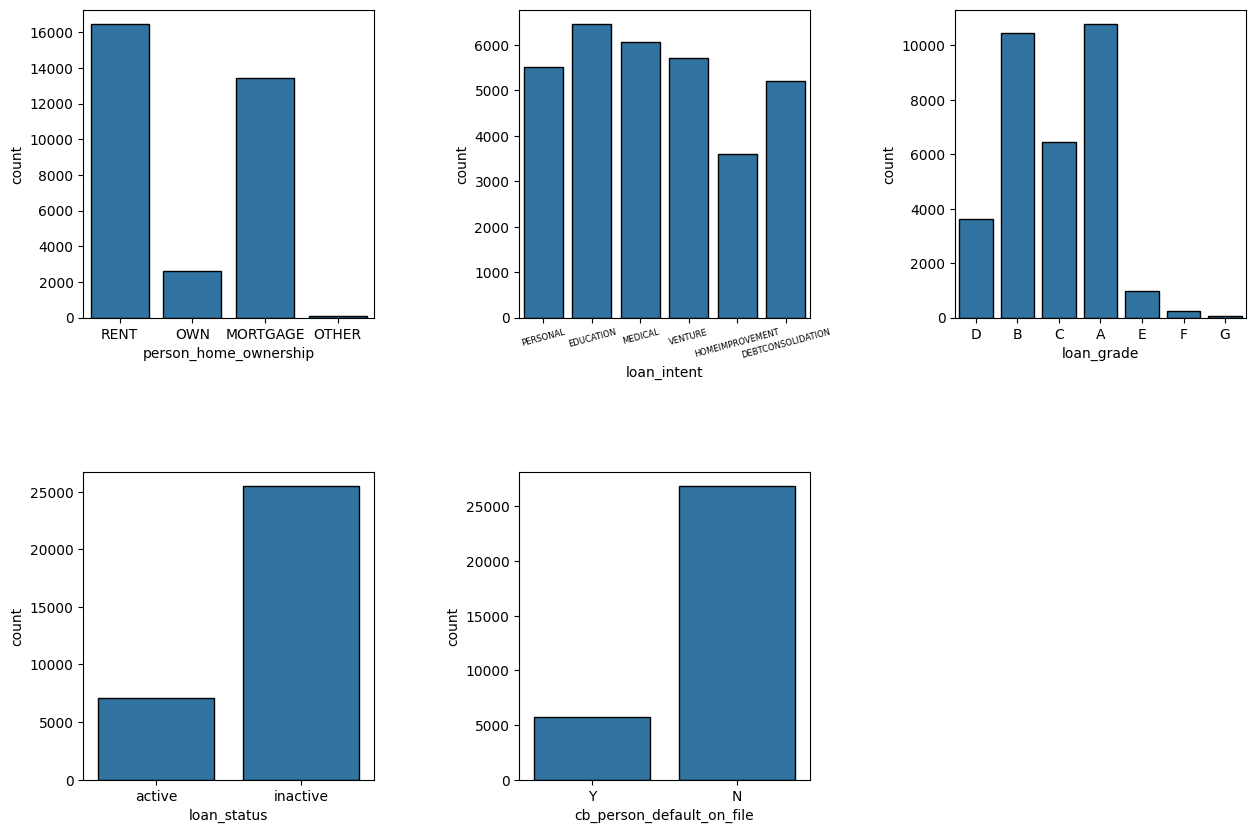

In [ ]:
fig7 = plt.figure(figsize=(15,10))
ax1_7 = fig7.add_subplot(2,3,1)
ax2_7 = fig7.add_subplot(2,3,2)
ax3_7 = fig7.add_subplot(2,3,3)
ax4_7 = fig7.add_subplot(2,3,4)
ax5_7 = fig7.add_subplot(2,3,5)


sns.countplot(x ="person_home_ownership", data = df_categoricas, ax=ax1_7, edgecolor= 'black')
sns.countplot(x ='loan_intent', data = df_categoricas, ax=ax2_7, edgecolor= 'black')
ax2_7.tick_params(axis='x', rotation=15, labelsize = 6)
sns.countplot(x ='loan_grade', data = df_categoricas, ax=ax3_7, edgecolor= 'black')
sns.countplot(x ='loan_status', data = df_categoricas, ax=ax4_7, edgecolor= 'black')
sns.countplot(x ='cb_person_default_on_file', data = df_categoricas, ax=ax5_7, edgecolor= 'black')

fig7.subplots_adjust(wspace=.5, hspace=.5)


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

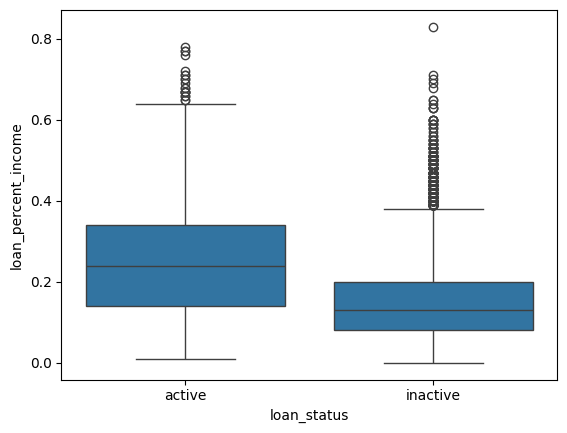

In [ ]:
#Se vuelven a unir dataframes numéricos y categóricos ya que la columna de loan_status tuvo un tratamiento previo(se convirtieron valores a activo e inactivo).
df_8 = pd.merge(df_numericas, df_categoricas, left_index=True, right_index=True)
sns.boxplot(x="loan_status",y="loan_percent_income",data=df_8)

#El gráfico indica que el prestamo en % del ingreso en estado 1 (activo) es mayor  que aquellos que se encuentran en estado 0 (inactivo).

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

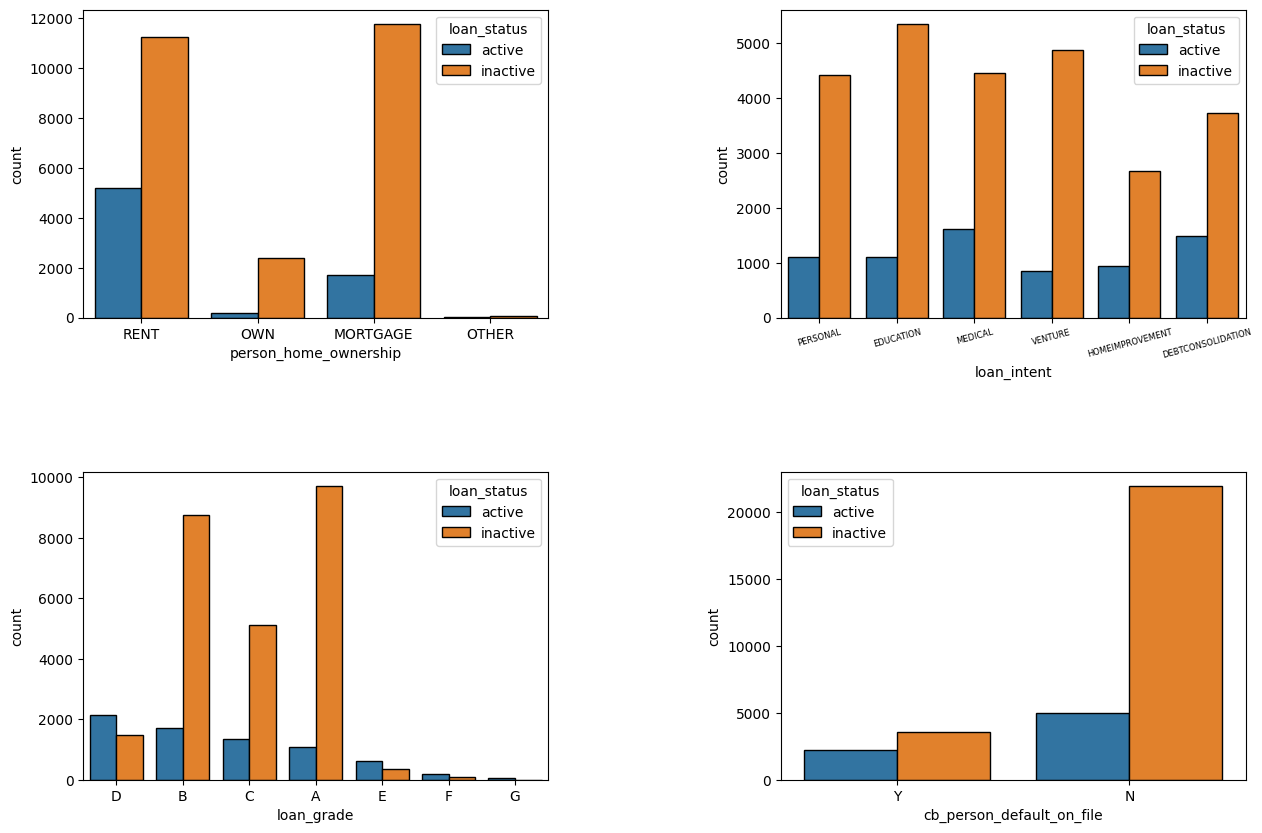

In [ ]:
fig9 = plt.figure(figsize=(15,10))
ax1_9 = fig9.add_subplot(2,2,1)
ax2_9 = fig9.add_subplot(2,2,2)
ax3_9 = fig9.add_subplot(2,2,3)
ax4_9 = fig9.add_subplot(2,2,4)


sns.countplot(x ="person_home_ownership", hue = "loan_status", data = df_categoricas, ax=ax1_9, edgecolor= 'black')
sns.countplot(x ='loan_intent', hue = "loan_status",data = df_categoricas, ax=ax2_9, edgecolor= 'black')
ax2_9.tick_params(axis='x', rotation=15, labelsize = 6)
sns.countplot(x ='loan_grade', hue = "loan_status", data = df_categoricas, ax=ax3_9, edgecolor= 'black')
sns.countplot(x ='cb_person_default_on_file', hue = "loan_status", data = df_categoricas, ax=ax4_9, edgecolor= 'black')

fig9.subplots_adjust(wspace=.5, hspace=.5)

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<Axes: >

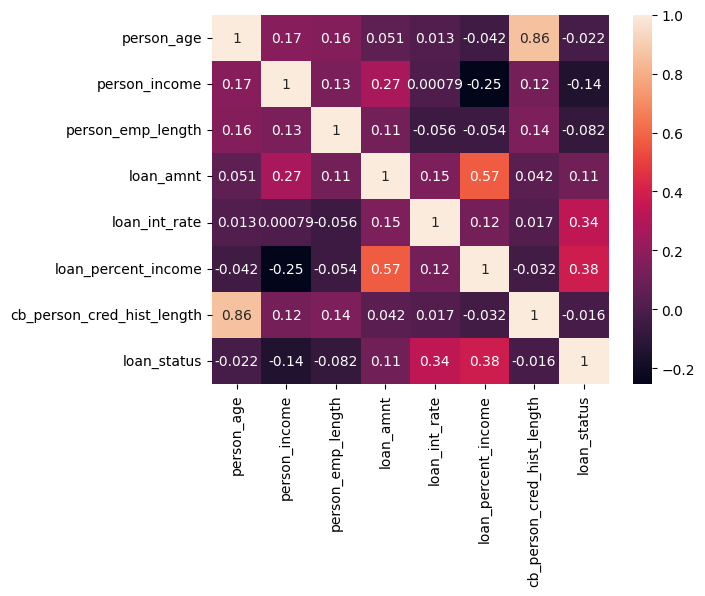

In [ ]:
#Según la rubrica se solicita para el análisis colo considerar valores numericos, se vuelve a incluir ¨loan_status¨ para encontrar el valor de correlación solicitado
df_correlation = df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']].corr(method='pearson')
sns.heatmap(df_correlation,annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns)

#La relación de correlación mas fuerte con la variable loan_status la tiene loan_int_rate